# Models Pipeline

We want to see how different models affect our dataset.

In [1]:
from preprocessing import load_dataset, split_dataset, grid_search, feature_interaction_polynomyal_degreee2, corresponding_features_interaction, corresponding_features_custom_interaction
from utilities import plot_grid_results, print_log
import models

We define the generic parameters, to be used to split the dataset.

In [2]:
test_size = 0.2         # the ratio of the dataset we want to use as test set
stratify = True         # Whether we want the split to keep the same proportion between classes as the original dataset
k = 5                   # The number of folds for the (stratified) k fold 

First of all, we load the dataset and we split it into training and test set (to be used only in the end).

We also apply different feature transformations to see if they improve our results.

In [3]:
# first, we load the dataset
X, y = load_dataset('./data/data.pkl')
# then, we split it
X_tr, y_tr, X_te, y_te = split_dataset(X, y, test=test_size, stratify=stratify)

# generate the dataset version with polynomyal features of degree 2
X_tr_poly = feature_interaction_polynomyal_degreee2(X_tr)

# generate the dataset version containing corresponding features interaction (the product)
# for example: (interest in music of x) * (interest in music of y)
X_tr_int_only = corresponding_features_interaction(X_tr, drop=True)
# X_tr_int_full = corresponding_features_interaction(X_tr, drop=False)

# generate the dataset version containing the result of a custom function that
# consider features interaction rewarding shared interests and penalizing unmatched interests
X_tr_custom_int_only = corresponding_features_interaction(corresponding_features_custom_interaction(X_tr), drop=True)
# X_tr_custom_int_full = corresponding_features_interaction(corresponding_features_custom_interaction(X_tr))

Now, we can start to try the grid search with different models, to see how it behaves.

Notice we want to have high __*recall*__ for class 'MATCH' (that is, we want to detect as many MATCH samples as possible). For this reason, we put recall as main metric for our grid search.

## K-Nearest Neighbors

We run a grid search on the kNN model, trying values of k from 1 to 10. Since our data is highly dimensional, we expect such an algorithm to perform bad.

### 1. No interactions, no PCA

In [4]:
# get pipeline 
pipe, grid = models.scaling(models.knn)
# call grid_search
out_knn = grid_search(X_tr, y_tr, pipe, grid, k)

print_log(out_knn)

Best model (according to recall): {'model__n_neighbors': 1, 'model__weights': 'uniform'}
-----------------------------------------
Recall : 0.22121566335476328
Balanced accuracy: 0.5368385842256359
f1: 0.21913922867942187


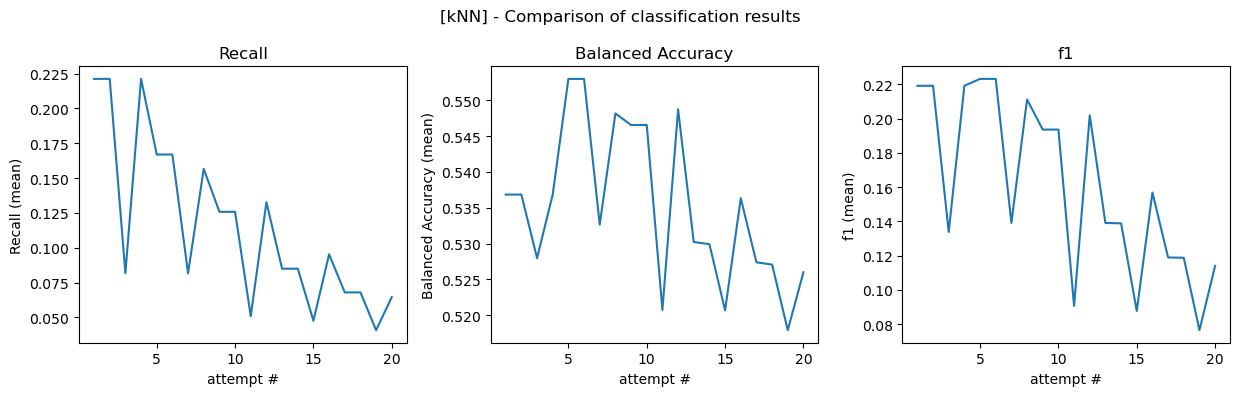

In [5]:
# Plot recall, balanced accuracy and f1 metric for every k in the range
plot_grid_results(out_knn, 'kNN')

### 2. Polynomial transformation, over sampling and PCA

In [6]:
# get pipeline 
pipe, grid = models.over_sampling(models.pca, n_components=[25, 58], model_f = models.knn)
# call grid_search
out_knn = grid_search(X_tr_poly, y_tr, pipe, grid, k)

print_log(out_knn)

Best model (according to recall): {'model__n_neighbors': 9, 'model__weights': 'distance', 'pca__n_components': 58}
-----------------------------------------
Recall : 0.581531268264173
Balanced accuracy: 0.6143554687173668
f1: 0.33288810082938947


### 3. Interactions only, over sampling and PCA

In [7]:
# get pipeline 
pipe, grid = models.over_sampling(models.pca, n_components=[25, 58], model_f = models.knn)
# call grid_search
out_knn = grid_search(X_tr_int_only, y_tr, pipe, grid, k)

print_log(out_knn)

Best model (according to recall): {'model__n_neighbors': 1, 'model__weights': 'uniform', 'pca__n_components': 58}
-----------------------------------------
Recall : 0.19736995908825247
Balanced accuracy: 0.5186421964759691
f1: 0.19078206391994357


### 4. Custom interactions only, over sampling

In [8]:
# get pipeline 
pipe, grid = models.over_sampling(models.knn)
# call grid_search
out_knn = grid_search(X_tr_custom_int_only, y_tr, pipe, grid, k)

print_log(out_knn)

Best model (according to recall): {'model__n_neighbors': 9, 'model__weights': 'distance'}
-----------------------------------------
Recall : 0.6632378725891291
Balanced accuracy: 0.5321729474536505
f1: 0.2701043099603074


### 5. Custom interactions only, over sampling, PCA

In [9]:
# get pipeline 
pipe, grid = models.over_sampling(models.pca, n_components=[25, 58], model_f = models.knn)
# call grid_search
out_knn = grid_search(X_tr_custom_int_only, y_tr, pipe, grid, k)

print_log(out_knn)

Best model (according to recall): {'model__n_neighbors': 9, 'model__weights': 'distance', 'pca__n_components': 58}
-----------------------------------------
Recall : 0.6190531852717708
Balanced accuracy: 0.5825673449869826
f1: 0.30478689679158416


## Logistic Regression

Normal Logistic Regression does not converge. We try some strategies to reduce the dimensionality of our data.

### 1. Polynomial transformation, scaling

In [10]:
# get pipeline 
pipe, grid = models.scaling(models.logistic_regression)
# call grid_search
out_lr_drop = grid_search(X_tr_poly, y_tr, pipe, grid, k)

print_log(out_lr_drop)

Best model (according to recall): {'model__C': 10000}
-----------------------------------------
Recall : 0.3470485096434833
Balanced accuracy: 0.6047834965559347
f1: 0.32770475526690734


### 2. Interactions only, scaling

In [11]:
# get pipeline 
pipe, grid = models.scaling(models.logistic_regression)
# call grid_search
out_lr_drop = grid_search(X_tr_int_only, y_tr, pipe, grid, k)

print_log(out_lr_drop)

Best model (according to recall): {'model__C': 10}
-----------------------------------------
Recall : 0.48971361776738753
Balanced accuracy: 0.5511845626740369
f1: 0.2738810777032711


### 3. Interactions only, over sampling and PCA

In [12]:
# get pipeline 
pipe, grid = models.over_sampling(models.pca, n_components=[20, 30, 58], model_f=models.logistic_regression)
# call grid_search
out_lr_pca = grid_search(X_tr_int_only, y_tr, pipe, grid, k)

print_log(out_lr_pca)

/home/ilaria/anaconda3/envs/malis/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ilaria/anaconda3/envs/malis/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/ilaria/anaconda3/envs/malis/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ilaria/anaconda3/envs/malis/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/ilaria/anaconda3/envs/malis/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', 

Best model (according to recall): {'model__C': 100, 'pca__n_components': 58}
-----------------------------------------
Recall : 0.074926943308007
Balanced accuracy: 0.5139189831778299
f1: 0.11207214827904481


### 4. Custom interactions and scaling

In [13]:
# get pipeline 
pipe, grid = models.scaling(models.logistic_regression)
# call grid_search
out_lr_pca = grid_search(X_tr_custom_int_only, y_tr, pipe, grid, k)

print_log(out_lr_pca)

Best model (according to recall): {'model__C': 10}
-----------------------------------------
Recall : 0.4624780829924021
Balanced accuracy: 0.5520124883919642
f1: 0.2716746184828013


## Random Forest

### 1. Polynomial transformation, over sampling and scaling

In [14]:
# get pipeline 
pipe, grid = models.over_sampling(models.scaling, model_f = models.random_forest)
# call grid_search
out_rf = grid_search(X_tr_poly, y_tr, pipe, grid, k)

print_log(out_rf)

Best model (according to recall): {'model__criterion': 'entropy', 'model__min_samples_split': 5, 'model__n_estimators': 100}
-----------------------------------------
Recall : 0.15312682641729983
Balanced accuracy: 0.5618052262643862
f1: 0.2325897627585391


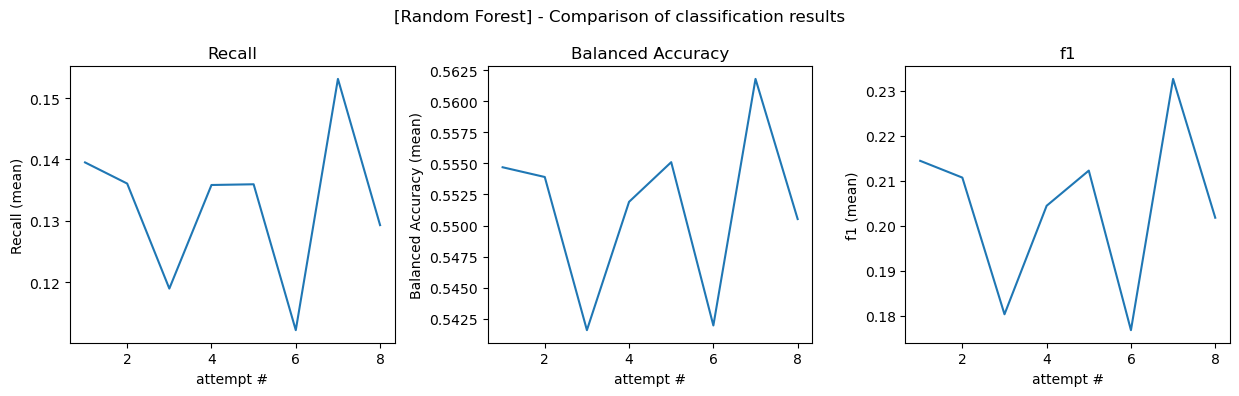

In [15]:
plot_grid_results(out_rf, 'Random Forest')

### 2. Interactions over sampling and scaling

In [16]:
# get pipeline 
pipe, grid = models.over_sampling(models.scaling, model_f = models.random_forest)
# call grid_search
out_rf = grid_search(X_tr_int_only, y_tr, pipe, grid, k)

print_log(out_rf)

Best model (according to recall): {'model__criterion': 'gini', 'model__min_samples_split': 2, 'model__n_estimators': 200}
-----------------------------------------
Recall : 0.01694915254237288
Balanced accuracy: 0.5031326074614232
f1: 0.029729144095341282


### 3. Custom interactions and over sampling

In [17]:
# get pipeline 
pipe, grid = models.over_sampling(models.random_forest)
# call grid_search
out_rf = grid_search(X_tr_custom_int_only, y_tr, pipe, grid, k)

print_log(out_rf)

Best model (according to recall): {'model__criterion': 'entropy', 'model__min_samples_split': 5, 'model__n_estimators': 100}
-----------------------------------------
Recall : 0.05780245470485096
Balanced accuracy: 0.5106888498362093
f1: 0.09175139204296605
